In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from scipy.special import airy

#### Defining the potential

In [ ]:
def potential(x):
    return np.abs(x)

In [ ]:
def plot_potential(V, x):

    plt.plot(x, V)
    plt.title('Potential')
    plt.ylabel('$V[x] / V_0$')
    plt.xlabel('$x / L$')
    plt.show()

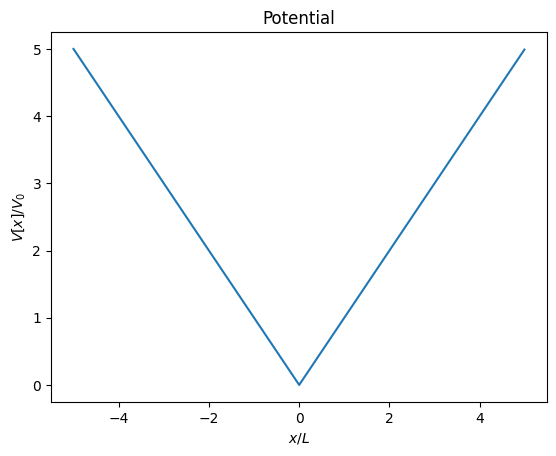

In [ ]:
# discretization parameters
N = 1000 #grid points
dx = 0.01 #spacing


x = np.arange(-N//2, N//2)*dx
V = potential(x)
plot_potential(V, x)

#### For the symmetric ground state:

In [ ]:
y = np.linspace(0, -5, 10000000)

Ai = airy(y)[0]

Maximum peak at y = 1.0187931018793102


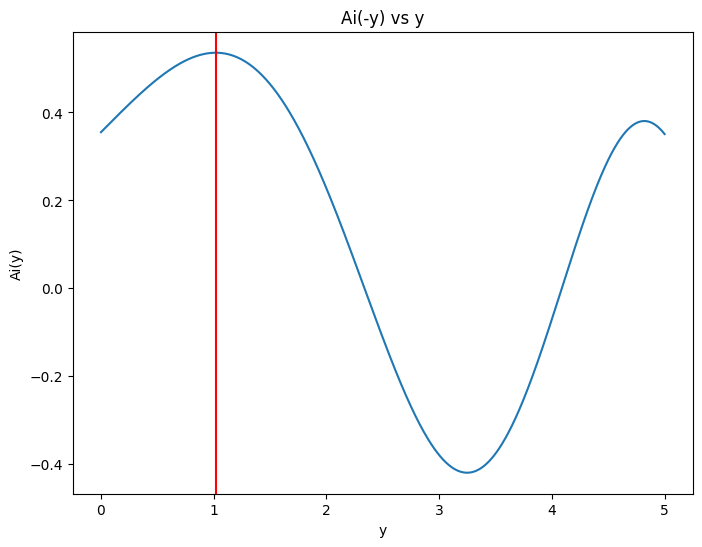

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(-y, Ai)
plt.xlabel('y')
plt.ylabel('Ai(y)')
plt.title('Ai(-y) vs y')

#finds the maximum peak and its corresponding y value
max_peak_index = np.argmax(Ai)
ypeak = -y[max_peak_index]

plt.axvline(ypeak, color='red')

print("Maximum peak at y =", ypeak)

##### This y value represents the ground state energy that makes $Ai(- y - ε_1)$ centered at y=0. This value also gives a root at 1.01879 for $Ai'(-ε_1)$.

#### For the asymmetric first excited state, the negative Airy function should be 0 at the y value of $ε_2$

In [ ]:
y = np.linspace(0, -5, 10000000)

Ai = airy(y)[0]

Intersection at y = 2.3381072338107236


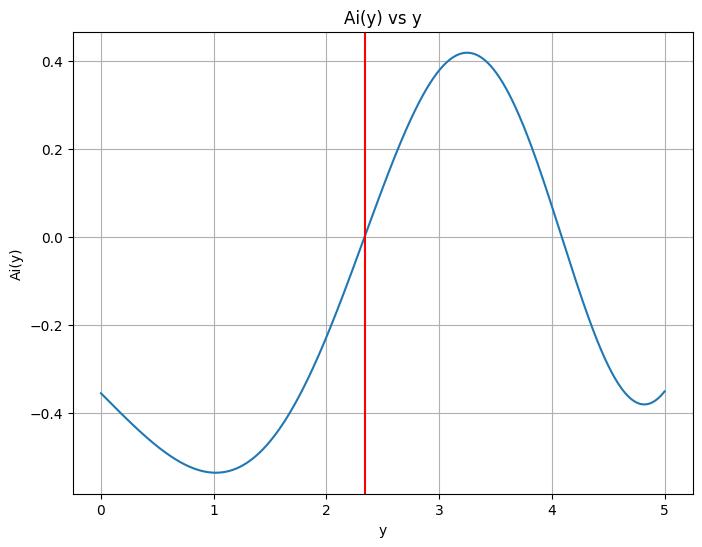

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(-y, -Ai)
plt.xlabel('y')
plt.ylabel('Ai(y)')
plt.title('Ai(y) vs y')
plt.grid(True)


y_range = np.where((-y >= 1) & (-y <= 3))
intercept_indices = np.where(np.diff(np.signbit(Ai[y_range])))[0]
x_intercept = np.interp(0, Ai[y_range][intercept_indices], y[y_range][intercept_indices])

plt.axvline(-x_intercept, color='red')


print("Intersection at y =", -x_intercept)



#### So, the exact energies are:

In [ ]:
#exact energies
E1 = 1.0187931018793102
E2 = 2.3381072338107236

#### This is the code that solves the Schrodinger equation numerically and extracts the wavefunctions for n=1 and n=2, where n is the energy level.

In [ ]:
def schrodinger(potential, n, bounds):
    x = np.linspace(-bounds, bounds, 200*bounds)
    dx = .01
    V = potential(x)

#this is the hamiltonian matrix
    H = np.zeros((len(x), len(x)))

    for i in range(len(x)):
        H[i, i] = V[i]

        if i > 0:
            H[i, i-1] = -1/(dx**2)

        if i < len(x) - 1:
            H[i, i+1] = -1/(dx**2)

#this finds the eigen values and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    wavefunction = eigenvectors[:, n-1]

# normalizes the wavefunctions (eiegenvectors)
    wavefunction /= np.sqrt(np.trapz(np.abs(wavefunction) ** 2, x))

    return x, wavefunction

x1, wavefunction1 = schrodinger(potential, 1, 7)
x2, wavefunction2 = schrodinger(potential, 2, 7)

##### "wavefunction1" and "wavefunction2" are the numerical wavefunctions

#### Numerically and analytically calculated wavefunctions probability plots
-

-

-

-

-

-

-


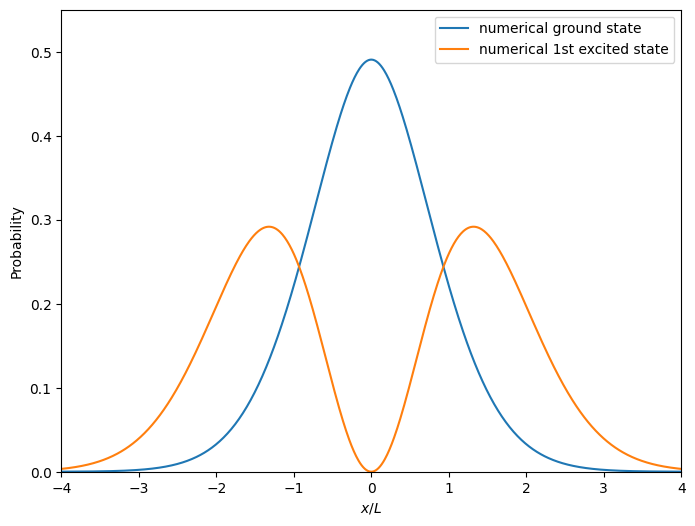

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x1, wavefunction1**2, label="numerical ground state")
plt.plot(x2, wavefunction2**2, label="numerical 1st excited state")
plt.xlabel("$x/L$")
plt.ylim(0, .55)
plt.xlim(-4,4)
plt.ylabel("Probability")
plt.legend()

##### Comparing analytical soltions with numerical solutions:

<ipython-input-84-88ab7a308ab5>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm_constant, _ = quad(lambda x: (Ais1[np.abs(x1 - x).argmin()])**2, -6, 6)


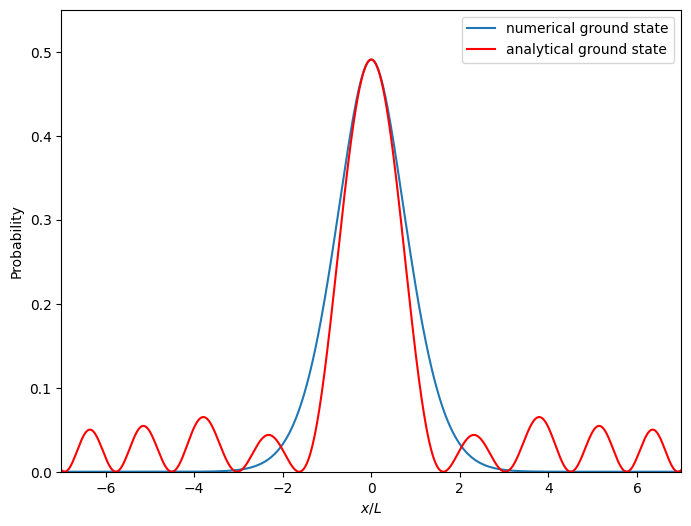

In [ ]:
from scipy.integrate import quad
#Im using a different integration method this time since the previous was not working with the airy functions for some unknown reason

Ais1 = airy(x1-1.0187931018793102)[0] + airy(-x1-1.0187931018793102)[0]
Ais1_squared = (Ais1)**2

norm_constant, _ = quad(lambda x: (Ais1[np.abs(x1 - x).argmin()])**2, -6, 6)

Ais1_normalized = Ais1/np.sqrt(norm_constant)


plt.figure(figsize=(8, 6))
plt.plot(x1, wavefunction1**2, label="numerical ground state")
plt.plot(x1, (Ais1_normalized)**2, 'r', label="analytical ground state")
plt.xlabel("$x/L$")
plt.xlim(-7,7)
plt.ylim(0,.55)
plt.ylabel("Probability")
plt.legend()

<ipython-input-107-bcd77d352881>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm_constant, _ = quad(lambda x: (Ais1[np.abs(x2 - x).argmin()])**2, -6, 6)


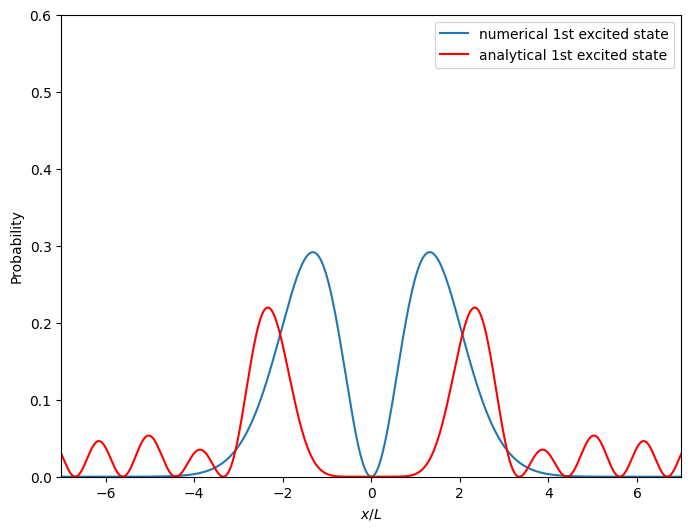

In [ ]:
from scipy.integrate import quad
#Im using a different integration method this time since the previous was not working with the airy functions for some unknown reason

Ais2 = airy(x2-2.3381072338107236)[0] + airy(-x2-2.3381072338107236)[0]
Ais2_squared = (Ais2)**2

norm_constant, _ = quad(lambda x: (Ais1[np.abs(x2 - x).argmin()])**2, -6, 6)

Ais2_normalized = Ais2/np.sqrt(norm_constant)


plt.figure(figsize=(8, 6))
plt.plot(x2, wavefunction2**2, label="numerical 1st excited state")
plt.plot(x2, (Ais2_normalized)**2, 'r', label="analytical 1st excited state")
plt.xlabel("$x/L$")
plt.xlim(-7,7)
plt.ylim(0,.6)
plt.ylabel("Probability")
plt.legend()

#### To calculate the first order corrections to the energies, I defined the following function that uses the perturbation potential $V_1 = e^{-x^2}$

-

-

##### The total potential is displayed in the following plot.

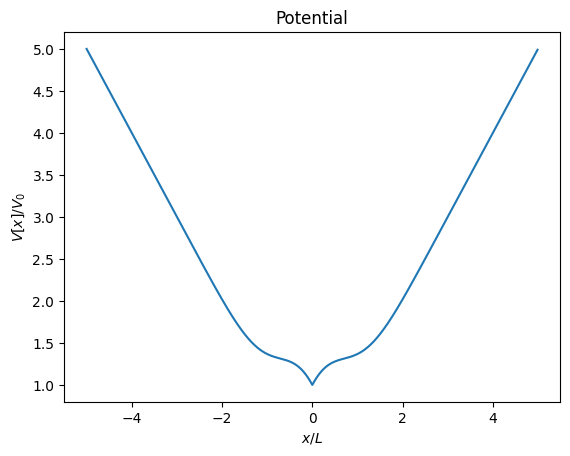

In [ ]:
def potential2(x):
    return np.abs(x) + np.exp(-(x)**2)

x = np.arange(-N//2, N//2)*dx
V = potential2(x)
plot_potential(V, x)

#### Analytical first order corrections:

In [ ]:
def first_correction(x, wavefunction):

    V1 = np.exp(-(x)**2)
    correction = np.trapz(wavefunction*V1*wavefunction, x)

    return correction

In [ ]:
x1 = np.linspace(-7, 7, 1200)
x2 = np.linspace(-7, 7, 1200)
correction1 = first_correction(x1, Ais1_normalized)
correction2 = first_correction(x2, Ais2_normalized)

print("First Order Correction:")
print("Ground State: {:.4f}".format(correction1))
print("First Excited State: {:.4f}".format(correction2))

First Order Correction:
Ground State: 0.6417
First Excited State: 0.0051


#### Analytical second order corrections:

In [ ]:
def second_correction(x, wavefunction_1, wavefunction_2):

    V1 = np.exp(-(x**2))
    integrand = (wavefunction_1*V1*wavefunction_2)**2/(np.abs(E1-E2))
    correction = np.trapz(integrand, x)

    return correction

In [ ]:
second_correction1 = second_correction(x1, Ais1_normalized, Ais2_normalized)
second_correction2 = second_correction(x2, Ais2_normalized, Ais1_normalized)
print("Second Order Corrections")
print("Ground State: {:.1f}".format(second_correction1))
print("First Excited State: {:.1f}".format(second_correction2))

Second Order Corrections
Ground State: 0.0
First Excited State: 0.0


Which aligns with expectation

#### Numerically and analytically calculated ground state wavefunction perturbation
-

-

-

-

-

-

-

-

-

-

-

In [ ]:
def wave_correction(x, wavefunction_1, wavefunction_2):

    V1 = np.exp(-(x)**2)
    integrand = (wavefunction_1*V1*wavefunction_2)/(E1-E2)
    correction = np.trapz(integrand, x)

    return wavefunction_1 + correction

First Order Correction to the Wavefunction:


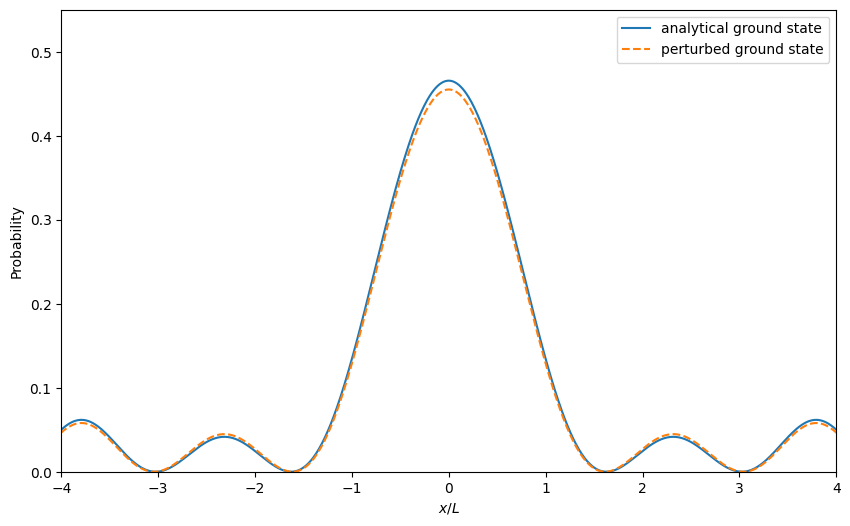

In [ ]:
wavecorrection1 = wave_correction(x1, Ais1_normalized, Ais2_normalized)

print("First Order Correction to the Wavefunction:")
plt.figure(figsize=(10, 6))
plt.plot(x1, Ais1_normalized**2, label="analytical ground state")
plt.plot(x1, wavecorrection1**2, '--', label="perturbed ground state")
plt.xlabel("$x/L$")
plt.ylim(0, .55)
plt.xlim(-4,4)
plt.ylabel("Probability")
plt.legend()

First Order Correction to the Wavefunction:


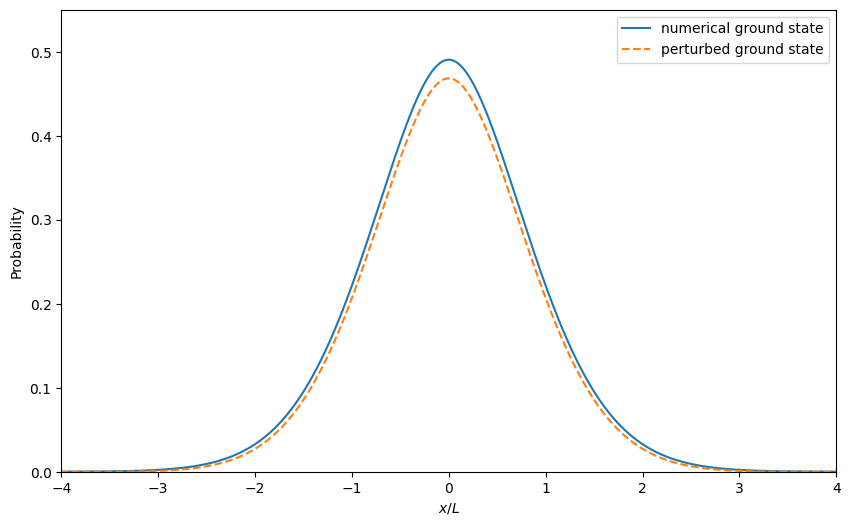

In [ ]:
wavecorrection1 = wave_correction(x1, wavefunction1, wavefunction2)

print("First Order Correction to the Wavefunction:")
plt.figure(figsize=(10, 6))
plt.plot(x1, wavefunction1**2, label="numerical ground state")
plt.plot(x1, wavecorrection1**2, '--', label="perturbed ground state")
plt.xlabel("$x/L$")
plt.ylim(0, .55)
plt.xlim(-4,4)
plt.ylabel("Probability")
plt.legend()